In [13]:
!pip install langgraph

In [14]:
!pip install langchain

In [15]:
# let Work with parallel Workflow
# let understand the prject

# hum cricket splayer ke liye worflow bananyge

# player ki strickret calulate karege
# round in roundery calulatekarege
# bolls per boundry calculate karege

# ye chije calucate karege
# humare pass hofa
# run of plauer
# six of playee
# four of plaer
# bolll ko player se kheli h


In [16]:
#let create state for grpah

from typing import TypedDict

class stateCricket(TypedDict):
  run : int
  six : int
  four : int
  ball : int

  sr: float
  rib : float


In [17]:
# let create Graph

from langgraph.graph import StateGraph

graph = StateGraph(stateCricket)

In [18]:
def calculate_sr(state:stateCricket):
  # we need to calultate sr
  sr = (state['run']/state['ball'])/100
  return {'sr': sr}


In [27]:
def caluater_per(state:stateCricket):
  # The calculation for rib was incorrect. It should be the percentage of runs from boundaries out of total runs.
  # Also, the TypeError was caused by trying to concatenate a list and an integer.
  rib = ((state['four']*4)+(state['six']*6))/state['run']*100

  # The state is updated and returned, but modifying the state directly within the function
  # is not necessary as the return value will update the state in langgraph.
  # state['rib'] = rib
  return {'rib': rib}

In [20]:
def summery(state:stateCricket):
  summary = f"""
   strick Rate - {state['sr']} /n
   rund in boundry - {state['rib']}
  """
  print(summary)
  return {'summary': summary }



In [21]:
# we need to calutate sr so

graph.add_node('calculate_sr',calculate_sr)
# let create ananther node percetage

graph.add_node('caluater_per',caluater_per )

graph.add_node('summery', summery)

In [22]:
# add edge
from langgraph.graph import START , END

graph.add_edge(START,'calculate_sr')
graph.add_edge(START, 'caluater_per')
graph.add_edge("calculate_sr", 'summery')
graph.add_edge("caluater_per", 'summery')
graph.add_edge('summery', END)

In [24]:
workflow = graph.compile()

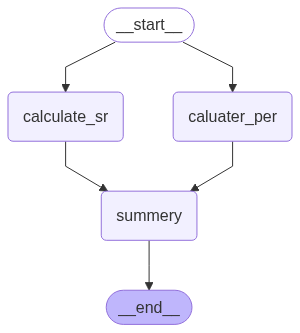

In [25]:
workflow


In [ ]:
workflow.invoke({
    'run': 100,
    'six': 50 ,
    'four': 30,
    'ball': 120
})